# Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Review

In [ ]:
# 1 - Load data

In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

In [17]:
# 2 - Build model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# 3 - Train model

In [24]:
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),    
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2970 - accuracy: 0.9150 - val_loss: 0.1384 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440 - accuracy: 0.9569 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9671 - val_loss: 0.0864 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9732 - val_loss: 0.0786 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0713 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9792 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0759 - val_accuracy:

In [25]:
# 4 - Evaluate model

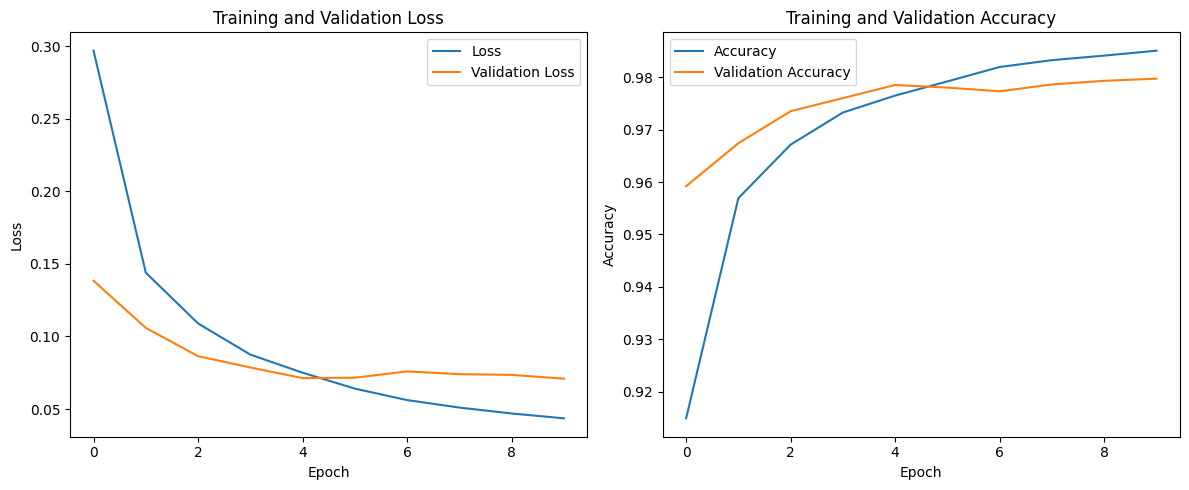

In [33]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot for loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')  
    plt.ylabel('Loss')   
    plt.legend()

    # Plot for accuracy
    plt.subplot(1, 2, 2) 
    plt.plot(history['accuracy'], label='Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')  
    plt.ylabel('Accuracy')  
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(r.history)


In [ ]:
# 5 - Predict

In [28]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.64798541e-09, 5.33810551e-10, 8.38899382e-07, ...,
        9.99994934e-01, 2.23557106e-09, 1.91006194e-07],
       [2.46015319e-10, 5.45741250e-06, 9.99994457e-01, ...,
        6.34518954e-14, 5.47394059e-08, 3.43585205e-18],
       [5.32434485e-10, 9.99971449e-01, 2.19858805e-07, ...,
        1.75434416e-05, 8.37549214e-06, 7.86468846e-09],
       ...,
       [1.36838659e-18, 4.10312201e-11, 5.12212131e-15, ...,
        5.88517679e-08, 6.32936414e-09, 1.40165532e-04],
       [1.12250554e-13, 3.92794060e-13, 5.67059283e-16, ...,
        4.36435610e-11, 9.09954920e-08, 1.63045236e-14],
       [4.93739183e-09, 9.27603730e-18, 6.55469412e-09, ...,
        4.22511760e-16, 1.87089450e-12, 1.21902038e-15]], dtype=float32)

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 971    0    0    0    0    1    3    2    1    2]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   4    1 1006    2    0    0    3    5   11    0]
 [   0    0    3  992    0    4    1    4    3    3]
 [   1    0    1    0  962    1    5    2    1    9]
 [   2    0    0   10    1  873    2    1    2    1]
 [   3    2    1    1    2    4  943    0    2    0]
 [   1    4   10    5    2    0    0  993    1   12]
 [   4    0    2    4    4    4    0    3  946    7]
 [   2    2    0    5    6    5    0    3    1  985]]


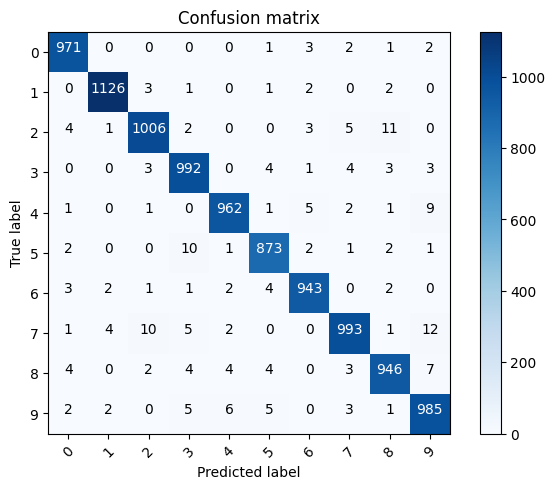

In [30]:
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)  # Ensure this matches your model's output
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))  # Replace list(range(10)) with actual class names if applicable


# What is Convolution? (Part 1)

 ## Convolution = image modifier

Convolution, in the context of a CNN, refers to a mathematical operation used for processing data with a grid-like topology, such as images.

**Detailed Explanation**
- **Fundamental Operation**: Convolution is a core operation in CNNs where a small matrix of weights, known as a `kernel` or `filter`, is applied to an input data (like an image) to extract features.


- **Sliding Window**: The kernel slides over the input data, and at each position, a dot product is computed between the kernel and the portion of the input it covers. This process effectively filters the input data to extract certain features (like edges, textures).


- **Feature Maps**: The result of this operation is a feature map that represents the presence of specific features in the input. For example, in image processing, different kernels can detect edges, blurs, or sharpen features.


- **Stacking Layers**: In CNNs, multiple convolutional layers are often stacked, with each layer capable of detecting more complex features. The first layer might detect simple edges, while deeper layers can detect more complex patterns.


- **Pooling Layers**: Often accompanied by pooling layers, which reduce the spatial dimensions (width and height) of the input volume for the next convolutional layer. This helps in reducing computational load and overfitting.


**Summary**
- Convolution in CNNs is a method where a kernel is used to extract features from data.


- This involves sliding the kernel over the input and computing dot products.


- It results in feature maps highlighting specific characteristics of the input.


- Multiple layers in CNNs detect increasingly complex features.


- Often paired with pooling to reduce dimensionality and computational complexity.


- Convolution plays a crucial role in enabling CNNs to perform well in tasks like image and video recognition, image classification, and many other areas where data can be represented in a grid-like format.

In [41]:
from scipy.signal import convolve2d

sample_image = np.array([
    [0, 10, 10, 0],
    [20, 30, 30, 20],
    [10, 20, 20, 10],
    [0, 5, 5, 0]
])

filter_layer = np.array([
    [1, 0],
    [0, 2]
])


In [43]:
# The mechanics of convolution

def manual_convolution(image, filter_):
    filter_height, filter_width = filter_.shape
    image_height, image_width = image.shape

    # The size of the output will be reduced by filter size - 1
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1

    # Prepare the output matrix
    new_image = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            new_image[i, j] = np.sum(image[i:i+filter_height, j:j+filter_width] * filter_)

    return new_image

In [44]:
output = manual_convolution(sample_image, filter_layer)
output

array([[60., 70., 50.],
       [60., 70., 50.],
       [20., 30., 20.]])

In [46]:
from scipy.signal import convolve2d

convolve2d(sample_image, np.fliplr(np.flipud(filter_layer)), mode='valid')

array([[60, 70, 50],
       [60, 70, 50],
       [20, 30, 20]])

mode = 'valid' has output size `N - K + 1`, where:

- input length = N
- kernel length = K

# CNN Architecture

# CNN for Fashion MNIST

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, GlobalMaxPooling2D, MaxPooling2D, Conv2D, BatchNormalization, Dense, Flatten, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist, cifar10

## Load data

In [15]:
fashion_mnist = fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


- **N**: Number of samples in the batch. This is the batch size, representing how many examples you process simultaneously during training or inference.


- **H**: Height of the input image or feature map. This is the number of pixels in the vertical dimension.


- **W**: Width of the input image or feature map. This is the number of pixels in the horizontal dimension.


- **C**: Channels of the input image or feature map. For a standard RGB image, this would be 3 (one for each color channel: red, green, and blue). For grayscale images, this would be 1. In feature maps within the CNN, this could represent different feature detectors.


This format (N x H x W x C) is commonly used in TensorFlow. In contrast, PyTorch uses a different ordering for the dimensions, typically N x C x H x W.

- Not the right shape for CNN, which expects N x H x W x C

- We must reshape to N x 28 x 28 x 1

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = np.expand_dims(x_train, -1)

x_test = np.expand_dims(x_test, -1)

In [18]:
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


## Build model

In [20]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

## Train model

In [28]:
model = Model(i, x)

In [29]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

r = model.fit(x_train, y_train,
             validation_data=(x_test, y_test),
             epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5200 - accuracy: 0.8080 - val_loss: 0.4094 - val_accuracy: 0.8471
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3624 - accuracy: 0.8633 - val_loss: 0.3568 - val_accuracy: 0.8670
Epoch 3/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3134 - accuracy: 0.8808 - val_loss: 0.3417 - val_accuracy: 0.8751
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2818 - accuracy: 0.8941 - val_loss: 0.3103 - val_accuracy: 0.8877
Epoch 5/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2550 - accuracy: 0.9043 - val_loss: 0.3121 - val_accuracy: 0.8862
Epoch 6/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2343 - accuracy: 0.9113 - val_loss: 0.3023 - val_accuracy: 0.8888
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2167 - accuracy: 0.9176 - val_loss: 0.2963 - val_ac

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


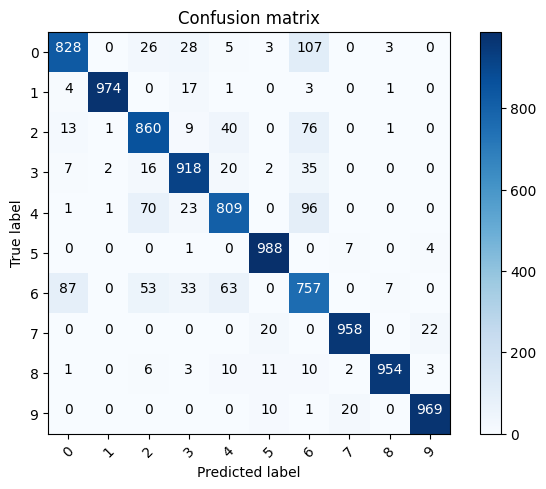

In [35]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [36]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

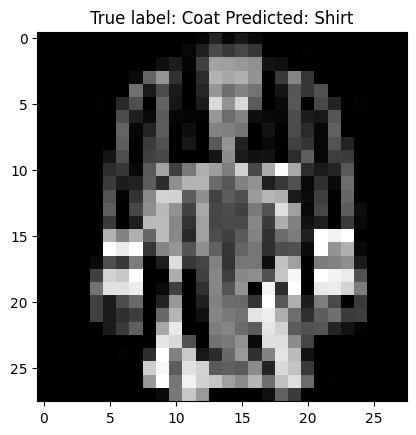

In [38]:
# show a misclassified img
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# CNN for CIFAR-10

In [42]:
cifar10 = cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


- **Label Format in CIFAR-10:**

The CIFAR-10 dataset, when loaded using a library like Keras, typically provides labels (`y_train` and `y_test`) in a 2D array format, where each label is an array with a single element. For example, if you have 50,000 training images, `y_train` will have the shape (50000, 1).


- **Simplifying the Label Format:**

Many machine learning models and functions expect labels in a simple 1D array format. In a 1D array, each label is just a number, not an array. So for the same 50,000 training images, a 1D label array would have the shape (50000,).
Using `flatten()` converts the 2D array of shape (50000, 1) to a 1D array of shape (50000,). This transformation simplifies operations like calculating loss or accuracy during model training and evaluation.


- **Compatibility with Model Functions:**

Most Keras and TensorFlow functions for model training (like fit) and evaluation work more seamlessly with labels in a 1D format. It's a more straightforward representation where each element in the array directly corresponds to a label.

In [43]:
K = len(set(y_train))
K

10

In [44]:
x_train[0].shape

(32, 32, 3)

In [48]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(62, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy' ,
              metrics=['accuracy'])

r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5255 - accuracy: 0.4462 - val_loss: 1.2439 - val_accuracy: 0.5586
Epoch 2/15
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1826 - accuracy: 0.5785 - val_loss: 1.0761 - val_accuracy: 0.6058
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0262 - accuracy: 0.6339 - val_loss: 1.0063 - val_accuracy: 0.6470
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9147 - accuracy: 0.6781 - val_loss: 0.9695 - val_accuracy: 0.6566
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8277 - accuracy: 0.7069 - val_loss: 0.8972 - val_accuracy: 0.6846
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7434 - accuracy: 0.7372 - val_loss: 0.8892 - val_accuracy: 0.6929
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6670 - accuracy: 0.7634 - val_loss: 0.8871 -

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization


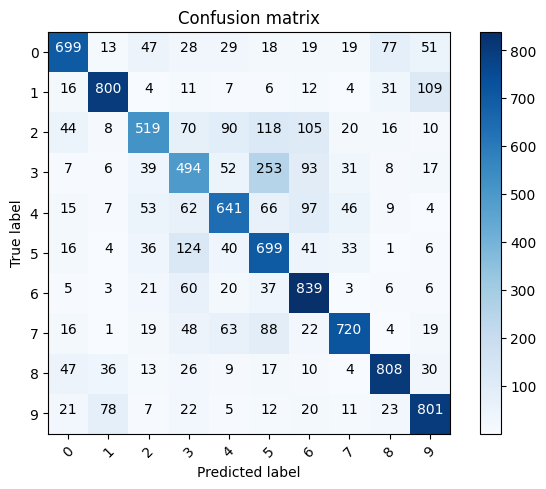

In [50]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

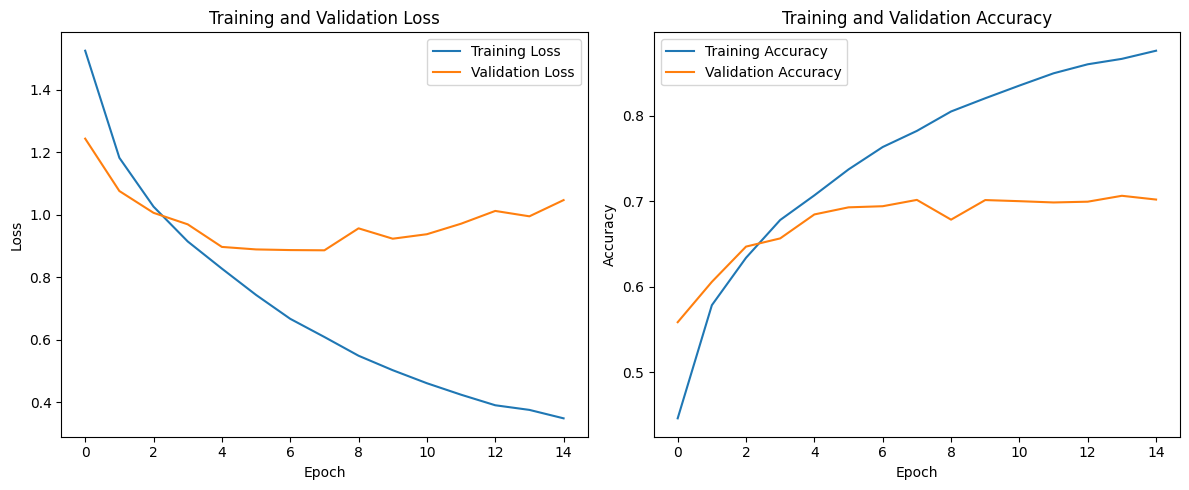

In [52]:
def plot_history(history):
    metrics = list(history.keys())
    num_metrics = len(metrics) // 2 
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(metrics[:num_metrics]):
        plt.subplot(1, num_metrics, i + 1)
        plt.plot(history[metric], label=f'Training {metric.capitalize()}')
        plt.plot(history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(r.history)

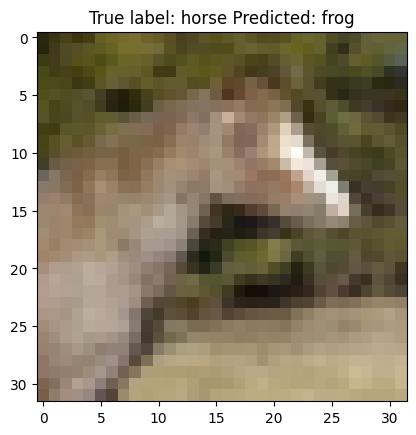

In [57]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Data Augmentation

In [58]:
# yield
def my_random_genarator():
    for _ in range(10):
        x = np.random.randn()
        yield x

A generator is a special type of iterator that generates values on the fly and maintains its state between iterations. When a generator function is called, it returns a generator object, but the code inside the function does not execute immediately.

In [61]:
def my_img_augmentation_generator():
    for x_batch, y_batch in zip(x_train, y_train):
        x_batch = augment(x_batch)
        yield x_batch, y_batch

In [60]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 horizontal_flip=True)

- other `args`:
    - width_shift_range
    - height_shift_range
    - rotation_range
    - brightness_range
    - shear_range
    - zoom_range
    - horizontal_flip
    - vertical_flip

In [ ]:
data_generator = ImageDataGenerator(
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 horizontal_flip=True)

train_generator = data_generator.flow(
                  x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator,
              steps_per_epoch=steps_per_epoch,
              epochs=50)

# Improving CIFAR-10 Results

In [62]:
# load data
cifar10_imp = cifar10

(X_train, y_train), (X_test, y_test) = cifar10_imp.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

In [64]:
K = len(set(y_train))
K

10

In [66]:
X_train[0].shape

(32, 32, 3)

In [73]:
# build model
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [72]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3399 - accuracy: 0.8781 - val_loss: 1.0501 - val_accuracy: 0.7031
Epoch 2/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.3174 - accuracy: 0.8865 - val_loss: 1.0741 - val_accuracy: 0.7060
Epoch 3/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3029 - accuracy: 0.8930 - val_loss: 1.1088 - val_accuracy: 0.6988
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2949 - accuracy: 0.8954 - val_loss: 1.0705 - val_accuracy: 0.7016
Epoch 5/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2817 - accuracy: 0.9018 - val_loss: 1.1288 - val_accuracy: 0.6887
Epoch 6/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2760 - accuracy: 0.9030 - val_loss: 1.1551 - val_accuracy: 0.7023
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.2643 - accuracy: 0.9079 - val_loss: 1.1183 -

In [78]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [79]:
# data augmentation

In [80]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

data_generator = ImageDataGenerator(
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip=True
                )

train_generator = data_generator.flow(X_train, y_train, batch_size)

steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch,
              epochs=15)

Epoch 1/15
1562/1562 [==============================] - 45s 28ms/step - loss: 0.8938 - accuracy: 0.6883 - val_loss: 0.8026 - val_accuracy: 0.7238
Epoch 2/15
1562/1562 [==============================] - 49s 31ms/step - loss: 0.8838 - accuracy: 0.6908 - val_loss: 0.8440 - val_accuracy: 0.7043
Epoch 3/15
1562/1562 [==============================] - 47s 30ms/step - loss: 0.8606 - accuracy: 0.6991 - val_loss: 0.7884 - val_accuracy: 0.7319
Epoch 4/15
1562/1562 [==============================] - 49s 31ms/step - loss: 0.8414 - accuracy: 0.7072 - val_loss: 0.7687 - val_accuracy: 0.7338
Epoch 5/15
1562/1562 [==============================] - 47s 30ms/step - loss: 0.8314 - accuracy: 0.7102 - val_loss: 0.8109 - val_accuracy: 0.7223
Epoch 6/15
1562/1562 [==============================] - 52s 33ms/step - loss: 0.8204 - accuracy: 0.7122 - val_loss: 0.7714 - val_accuracy: 0.7335
Epoch 7/15
1562/1562 [==============================] - 55s 35ms/step - loss: 0.8145 - accuracy: 0.7174 - val_loss: 0.7318 -

In [ ]:
plot_history(r.history)

In [ ]:
# 3 x 3 x 3 x 32 = 864 (filter size)
# 864 + 32 = 896 (bias term)

In [ ]:
model.summary()

# Facial Recognition Exercise